<a href="https://colab.research.google.com/github/calladogt/Research-internship/blob/master/Simulators/ks-simulator/KS-modelFF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction of the KS system: a model using Feed-Forwark Neural Network

 In this notebook, I will use a simple model of Deep Learning to predict the KS system. More precisely, we wanna predict the next step of a given state of the system. To do it, a simple feed-forward neural network will be used.
It is just the first model trained to predict the system. I will try many configurations and varieties.

To generate the data, I will use the KS.py code provided by Alessandro Bucci.

In [0]:
import numpy as np
import torch as th
import time
from scipy import stats
from KS import KS
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Data Generation

First, let's set the parameters of the simulation:

In [0]:
final_time = 10000 # the total time of the simulation
dt = 0.1 # the time step 
length = 20 # the "physical" length of the domaine. pay attention cuz this value will determine if the system is regular or chaotic
sample_points =64 # the number of sample points on this length. It will be the size of the input in our system
current_state = np.loadtxt('u1.dat') #the observed initial state of the system

Take a look on the observation:

Text(0.5, 1.0, 'Initial State')

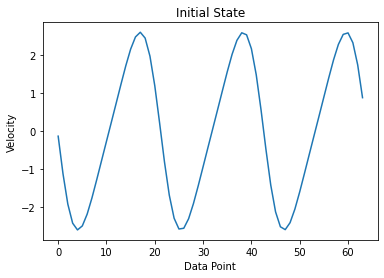

In [5]:
plt.plot(current_state)
plt.xlabel('Data Point')
plt.ylabel('Velocity')
plt.title('Initial State')

If we wanna run a simulation to generate the data, do it here (either we run the next cell to load a data)

In [10]:
ks = KS(L=length,N=sample_points,dt=dt) #class of the simulation
total_interactions = int(np.round(final_time/dt))
print("Running for : ",final_time, 'seconds', 'with', total_interactions, 'interactions')
time_counter = 0 
action = np.zeros(1) # in this simulation, we will set actions=0
state_history = np.matrix(current_state) # We will stack in U at each time step

for nt in range(total_interactions): 
    current_state = ks.advance(current_state,action)
    state_history = np.vstack((state_history,current_state))
    time_counter = np.hstack((time_counter,(nt+1)*ks.dt))
    if time_counter[-1]==100:
      print('ok1')
    if time_counter[-1]==1000:
      print('ok2')
    if time_counter[-1]==2500:
      print('ok3')
    if time_counter[-1]==5000:
      print('ok4')
    if time_counter[-1]==10000:
      print('ok5')
    if time_counter[-1]==50000:
      print('ok6')

# Explore the results 
position_x=ks.x
print('The state_history shape is:', state_history.shape)
print('The final time:', time_counter[-1])

Running for :  10000 seconds with 100000 interactions
ok1
ok2
ok3
ok4
ok5
The state_history shape is: (100001, 64)
The final time: 10000.0


Load the data here:

In [13]:
from numpy import savetxt
# save to csv file
#savetxt('state_history.dat', state_history)
#savetxt('time_counter.dat', time_counter)
#savetxt('position.dat', ks.x)



# load numpy array
from numpy import load
# load array
# state_history = np.loadtxt('state_history.dat')
# time_counter = np.loadtxt('time_counter.dat')
# position_x = np.loadtxt('position.dat')

print('The state_history shape is:', state_history.shape)
print('The final time:', time_counter[-1])

The state_history shape is: (100001, 64)
The final time: 10000.0


In [0]:
def drawKS(U_sim, x_axis, t_axis ,startT=0,endT=0, width = 10, divwidth = 4): 
    fig = plt.figure(figsize=(width, width/divwidth))
    ax = fig.gca()
    ola = ax.contourf(t_axis[startT:endT], x_axis, U_sim[startT:endT,:].T,  cmap=plt.cm.viridis)
    cbar = plt.colorbar(ola)
    plt.xlabel('Time evolution')
    plt.ylabel('Position X')
    plt.title('Spatiotemporal solution of KS equation')
    plt.show()

# Exploring the data

Let's take a look on the generated data:

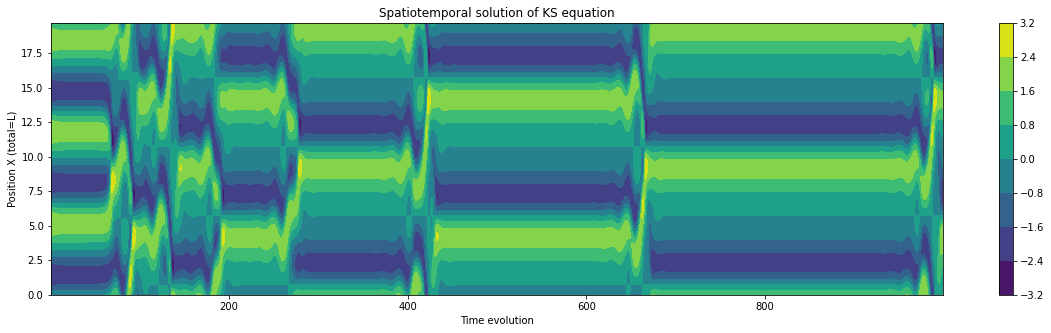

For the initial state:
Mean: -1.6449897000114788e-12
Median: -0.01860920546858135
Max: 2.597094946377533
Min: -2.596082927038164
Mode: ModeResult(mode=array([-2.59608293]), count=array([1]))
Variance: 3.1751939863757297


Text(0.5, 0, 'Time evolution')

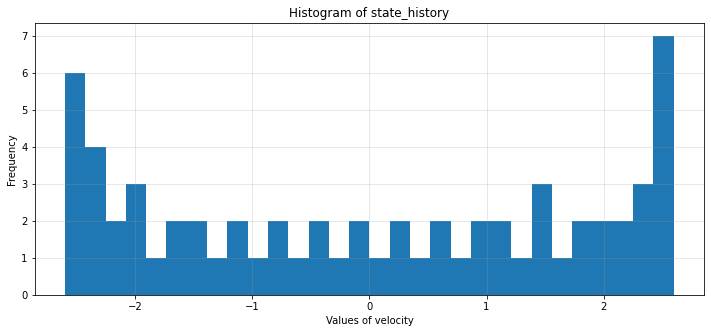

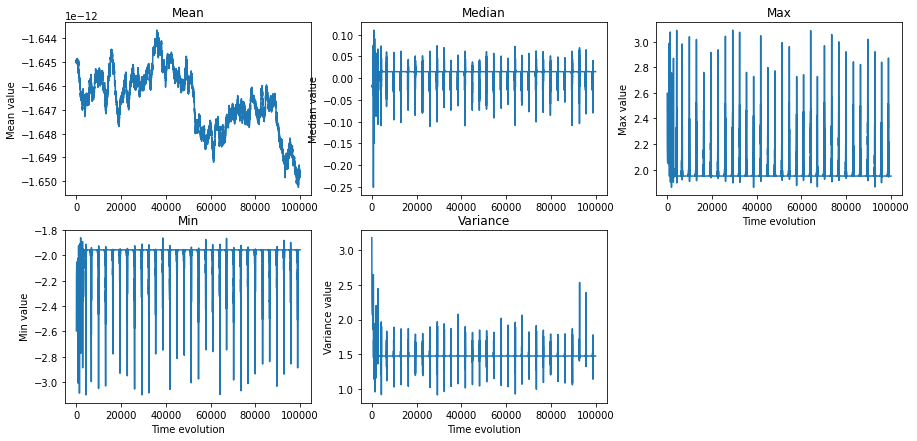

In [80]:
state_history_array = np.squeeze(np.asarray(state_history))

#visualizing the solution of KS equation
drawKS(state_history, position_x, time_counter,1,int(time_counter[-1]),20,4)


#histogram
fig, ax = plt.subplots(figsize=(12, 5))
plt.hist(state_history_array[0,:],bins=30)
plt.xlabel('Values of velocity')
plt.ylabel('Frequency')
plt.title('Histogram of state_history')
plt.grid(True, color="#93a1a1", alpha=0.3)


#statistic values
print('For the initial state:')
print('Mean:', np.mean(state_history_array[0,:]))
print('Median:', np.median(state_history_array[0,:]))
print('Max:', np.max(state_history_array[0,:]))
print('Min:', np.min(state_history_array[0,:]))
print('Mode:', stats.mode(state_history_array[0,:]))
print('Variance:', np.var(state_history_array[0,:]))

#evolution of statistic values
fig, ax = plt.subplots(figsize=(15, 7))
plt.subplot(2,3,1)
plt.plot(np.mean(state_history_array,axis=1))
plt.title('Mean')
plt.ylabel('Mean value')
plt.subplot(2,3,2)
plt.plot(np.median(state_history_array,axis=1))
plt.title('Median')
plt.ylabel('Median value')
plt.subplot(2,3,3)
plt.plot(np.max(state_history_array,axis=1))
plt.title('Max')
plt.ylabel('Max value')
plt.xlabel('Time evolution')
plt.subplot(2,3,4)
plt.plot(np.min(state_history_array,axis=1))
plt.title('Min')
plt.ylabel('Min value')
plt.xlabel('Time evolution')
plt.subplot(2,3,5)
plt.plot(np.var(state_history_array,axis=1))
plt.title('Variance')
plt.ylabel('Variance value')
plt.xlabel('Time evolution')


Let's normalize the data to be between [-0.975,0.975]. It will allow us to use other activation fonction (like Tanh):

For the initial state:
Mean: 0.0005658911162219459
Median: 0.014581166798754378
Max: 0.9750000000000001
Min: -0.975
Mode: ModeResult(mode=array([-0.975]), count=array([5]))
Variance: 0.4552834007723886


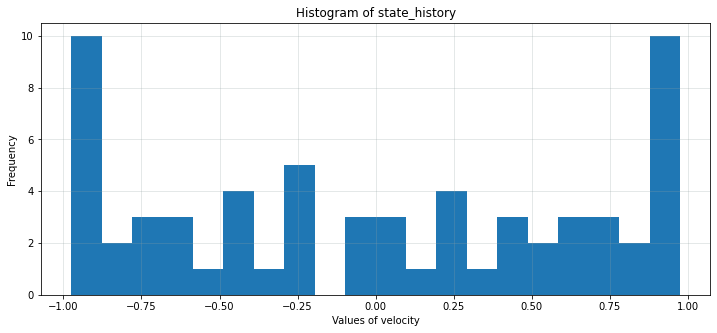

In [91]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-0.975,0.975))
state_history_array_normalized = min_max_scaler.fit_transform(state_history_array)

#histogram
fig, ax = plt.subplots(figsize=(12, 5))
plt.hist(state_history_array_normalized[0,:],bins=20)
plt.xlabel('Values of velocity')
plt.ylabel('Frequency')
plt.title('Histogram of state_history')
plt.grid(True, color="#93a1a1", alpha=0.3)

#statistic values
print('For the normalized initial state:')
print('Mean:', np.mean(state_history_array_normalized[0,:]))
print('Median:', np.median(state_history_array_normalized[0,:]))
print('Max:', np.max(state_history_array_normalized[0,:]))
print('Min:', np.min(state_history_array_normalized[0,:]))
print('Mode:', stats.mode(state_history_array_normalized[0,:]))
print('Variance:', np.var(state_history_array_normalized[0,:]))


Separating the data into training and test sets:

In [0]:
X = state_history_array_normalized[:-1,:] #our input: all the data excluding the last one
Y = state_history_array_normalized[1:,:] #our output: all the data minus the first one

NN = state_history_array_normalized.shape[0]-1
Nt = int(NN*0.9) # number of train
Nv = int(NN*0.1) # number of validation


np.random.seed(0)
seq=np.arange(X.shape[0])
np.random.shuffle(seq)
train_seq=seq[0:Nt]
valid_seq=seq[-Nv:]
X_train = X[train_seq]
Y_train = Y[train_seq]
X_valid = X[valid_seq]
Y_valid = Y[valid_seq]
X_train_th = th.from_numpy(X_train).cuda()
Y_train_th = th.from_numpy(Y_train).cuda()
X_valid_th = th.from_numpy(X_valid).cuda()
Y_valid_th = th.from_numpy(Y_valid).cuda()

# Training

In [0]:
def train(model,X_train,X_valid,Y_train,Y_valid,epochs=30,batch_size=64):
    Nt=len(X_train)
    Nv=len(X_valid)
    ### Mini-batching and shuffle 
    idx = np.arange(Nt)
    nbatch = int(Nt/batch_size)
    train_losses,valid_losses=[],[]
    start_time=time.time()
    print("Epoch\tTrain Loss\tValid Loss")

    #Just to see our random parameters
    model.eval()
    with th.no_grad():
        running_loss=0
        for bi in range(nbatch):
            ids = idx[bi*batch_size:(bi+1)*batch_size]
            x = X_train[ids]
            ttf_calc=model(x).squeeze()
            ttf = Y_train[ids]
            loss=loss_fn(ttf_calc,ttf)
            running_loss+=loss.item()
        train_losses.append(running_loss/nbatch)
        running_loss=0
        ttf_calc=model(X_valid).squeeze()
        ttf = Y_valid
        loss=loss_fn(ttf_calc,ttf)
        running_loss+=loss.item()
        valid_losses.append(running_loss)            
    for e in range(epochs):
        model.train()
        print("{}\t".format(e),"{:.5f}..\t".format(train_losses[-1]),"{:.5f}..".format(valid_losses[-1]))  
        np.random.shuffle(idx)
        running_loss=0
        for bi in range(nbatch):
            ids = idx[bi*batch_size:(bi+1)*batch_size]
            x = X_train[ids]
            optimizer.zero_grad()
            ttf_calc=model(x).squeeze()
            ttf = Y_train[ids]
            loss=loss_fn(ttf_calc,ttf)
            loss.backward()
            optimizer.step()
            running_loss+=loss.item()
        # training is over for one epoch
        # now compute interesting quantities
        model.eval()
        train_losses.append(running_loss/nbatch)
        running_loss=0
        with th.no_grad():
            x = X_valid
            ttf_calc=model(x).squeeze()
            ttf = Y_valid
            loss=loss_fn(ttf_calc,ttf)
            running_loss+=loss.item()
            valid_losses.append(running_loss)  
    print("{}\t".format(e+1),"{:.5f}..\t".format(train_losses[-1]),"{:.5f}..".format(valid_losses[-1]))     
    print("---------- Best : {:.3f}".format(min(valid_losses)), " at epoch " 
          , np.fromiter(valid_losses, dtype=np.float).argmin(), " / ",epochs )
    print('Execution time={:.2f}s'.format(time.time()-start_time))
    #plot some graphs
    plt.figure(figsize = (9, 1.5))
    ax= plt.subplot(1, 2, 1)
    plt.plot(train_losses)
    ax.set_ylim(bottom=0)
    ax= plt.subplot(1, 2, 2)
    plt.plot(valid_losses)
    ax.set_ylim(bottom=0)

# Model

Epoch	Train Loss	Valid Loss
0	 0.38119..	 0.38145..
1	 0.04712..	 0.01786..
2	 0.01453..	 0.01120..
3	 0.01030..	 0.00842..
4	 0.00793..	 0.00673..
5	 0.00650..	 0.00566..
6	 0.00562..	 0.00494..
7	 0.00501..	 0.00457..
8	 0.00457..	 0.00415..
9	 0.00423..	 0.00385..
10	 0.00397..	 0.00367..
11	 0.00377..	 0.00350..
12	 0.00361..	 0.00332..
13	 0.00347..	 0.00325..
14	 0.00336..	 0.00314..
15	 0.00327..	 0.00303..
16	 0.00318..	 0.00308..
17	 0.00311..	 0.00296..
18	 0.00305..	 0.00290..
19	 0.00299..	 0.00283..
20	 0.00294..	 0.00276..
21	 0.00289..	 0.00275..
22	 0.00285..	 0.00267..
23	 0.00280..	 0.00269..
24	 0.00276..	 0.00265..
25	 0.00272..	 0.00262..
26	 0.00268..	 0.00257..
27	 0.00265..	 0.00251..
28	 0.00262..	 0.00253..
29	 0.00259..	 0.00248..
30	 0.00256..	 0.00246..
---------- Best : 0.002  at epoch  30  /  30
Execution time=89.20s


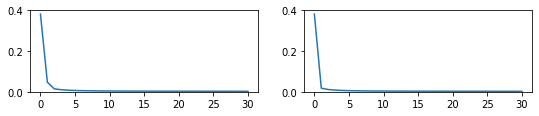

In [97]:
n_input=64
n_output=64
n_hidden=128
model = th.nn.Sequential(
    th.nn.Linear(n_input,n_hidden),
    th.nn.LeakyReLU(),
    th.nn.Linear(n_hidden,n_output),
    th.nn.Tanh()
)
model.double()
model.cuda()
optimizer=th.optim.Adam(model.parameters(),lr=1e-4)
loss_fn=th.nn.L1Loss()
train(model,X_train_th,X_valid_th,Y_train_th,Y_valid_th,epochs=30,batch_size=64)